# Trend of number of Rides for Citi Bike (New York, 2014) 
## by Manju Saini

## Investigation Overview

> In this investigation, I want to look at the trend of number of rides. The main focus was on analysing effect of monthly, weekly, hour, usertype and trip duration on number of rides.

## Dataset Overview

> A random sample of 10000 records was taken from bigger original dataset, for ease of processing. The new small dataset has data points for the entire year 2014. The main features in the dataset are Trip Duration (seconds), Start Time and Date, Stop Time and Date, Start Station Name, End Station Name, Bike ID, User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)along with other features - Station ID, Station Lat/Long, Gender (Zero=unknown; 1=male; 2=female), Year of Birth. starttime_month, starttime_hour, starttime_day_name, starttime_date were derived from Start Time and Date feature for analysis purpose. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trip = pd.read_csv("trip_sample_10000.csv")

In [3]:
trip.dropna(subset=['start station id','end station id', 'bikeid','start station name', 'end station name', 'usertype'], axis=0, inplace=True)

# date type columns to correct format
for d_col in ['starttime', 'stoptime']:
    trip[d_col] = pd.to_datetime(trip[d_col])
    
trip.sort_values(by='starttime', inplace=True)

# int colums to str type
for int_col in ['start station id', 'end station id', 'bikeid']:
    trip[int_col] = pd.Categorical(trip[int_col], categories = trip[int_col].unique(), ordered=False)
    

trip = trip[['tripduration', 'starttime', 'stoptime', 'start station id'
       ,'end station id', 'bikeid', 'usertype','birth year', 'gender','start station name', 'end station name']]

def get_time_of_day(x):
    return str(x.hour)

trip['starttime_hour'] = trip['starttime'].apply(get_time_of_day)
trip['starttime_day_name'] = trip['starttime'].dt.day_name()

trip['starttime_month_name'] = trip['starttime'].dt.month_name()
trip['starttime_date'] = trip['starttime'].dt.date

dayname_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trip['starttime_day_name'] = pd.Categorical(trip['starttime_day_name'], categories=dayname_order, ordered=True)

months_order = ['January','February','March','April','May','June', 'July','August','September','October', 'November','December']
trip['starttime_month_name'] = pd.Categorical(trip['starttime_month_name'], categories=months_order, ordered=True)

hours_order = ["0",  "1",  "2",  "3",  "4",  "5",  "6",  "7",  "8",  "9", "10", "11", "12", "13", "14", "15", "16",
       "17", "18", "19", "20", "21", "22", "23"]
trip['starttime_hour'] = pd.Categorical(trip['starttime_hour'], categories=hours_order, ordered=True)

trip['tripduration_min'] = trip.tripduration/60

## Trend of number of rides with hour, day and month

> Most of the rides are in weekdays(Monday-Friday), this can be because of these days are working days. Also there is not a very huge difference between weekdays and weekends.

> Months from May to October have the most rides, with Feburary being the lowest. This can be attributed to temperature being lowest in February.

> Most of the rides takes place between 8 - 10 hours, 15 - 20 hours and small peak at 12 hours. People are riding while travelling to office, for lunch and back from office to home.

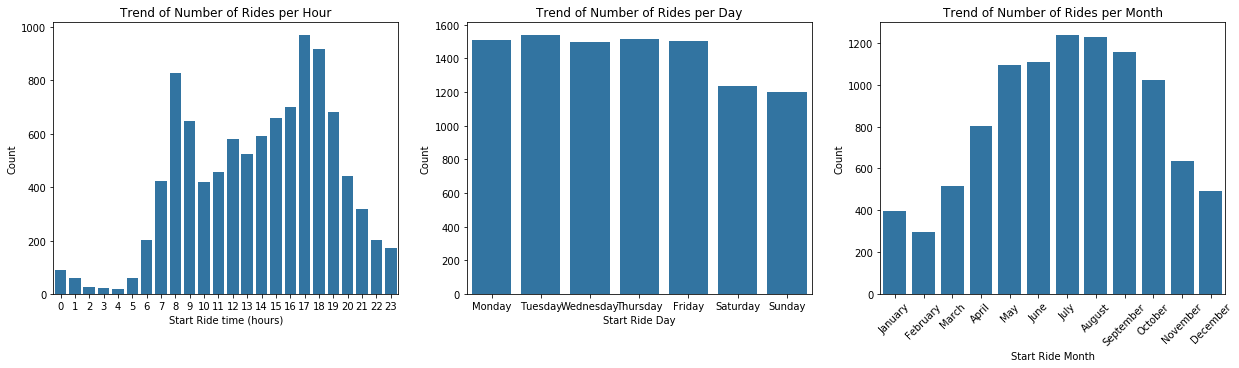

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = [21,5])
base_color = sb.color_palette()[0]

cat_var = ['starttime_hour','starttime_day_name', 'starttime_month_name']
for n in np.arange(0, len(cat_var)):
    col = cat_var[n]
    sb.countplot(data=trip, x=col, color=base_color, ax = ax[n]);

ax[0].set_xlabel("Start Ride time (hours)")
ax[0].set_ylabel("Count")
ax[0].set_title("Trend of Number of Rides per Hour");
ax[1].set_xlabel("Start Ride Day")
ax[1].set_ylabel("Count")
ax[1].set_title("Trend of Number of Rides per Day");
ax[2].set_xlabel("Start Ride Month")
ax[2].set_ylabel("Count")
ax[2].set_title("Trend of Number of Rides per Month");
plt.xticks(rotation=45);

## Distribution on tripduration

> Tripduration has a long-tailed distribution, with 45 trips having trip duration more than 100 mins and rest of the 9955 trips having trip duration less than 100 mins. 

> Some rides had extremely high values (5 to 23 hours) for trip duration, this can be due some system error , or some other issue. These outlier records were removed for maintaining consistency.

> Plotted on a logarithmic scale, the distribution of tripduration takes unimodal shape.

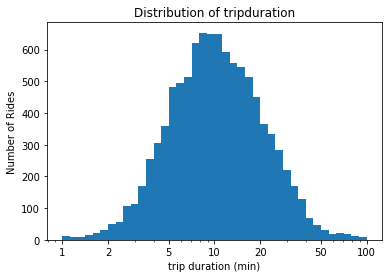

In [5]:
trip = trip.query('tripduration_min < 100')

trip.shape[0]
log_bin_size = 0.05
bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
plt.hist(data=trip, x='tripduration_min', bins=bins)
plt.xscale('log')
plt.xticks([1, 2, 5,10,20,50,100], [1, 2, 5,10,20,50,100])
plt.xlabel('trip duration (min)');
plt.ylabel('Number of Rides')
plt.title('Distribution of tripduration');

## Percentage of Rides by Subscriber and Customer

> 90.3% of the rides are taken by Subscribers and 9.7% by Customers.

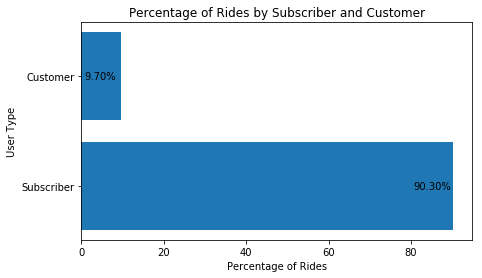

In [6]:
plt.figure(figsize=[7,4])

user_df = round(trip['usertype'].value_counts()*100/trip.shape[0], 1).reset_index().rename(columns={'index':'usertype', 'usertype':'percentage_rides'})
ax = plt.barh(user_df['usertype'], user_df['percentage_rides'], color=base_color);
plt.ylabel('User Type')
plt.xlabel('Percentage of Rides');
plt.title("Percentage of Rides by Subscriber and Customer");
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width()-5, p.get_y()+0.50*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

## Top 10 High Traffic Stations

Stations with highest outgoing traffic and incoming traffic are:

> 1. 8 Ave & W 31 St
> 2. Lafayette St & E 8 St
> 3. E 17 St & Broadway
> 4. West St & Chambers St
> 5. University Pl & E 14 St
> 6. Broadway & E 14 St
> 7. Broadway & E 22 St
> 8. W 21 St & 6 Ave
> 9. Christopher St & Greenwich St
> 10. Broadway & W 24 St

In [7]:
starting_rides = trip.groupby('start station name').agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid': 'start station bike count'})
ending_rides = trip.groupby('end station name').agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid': 'end station bike count'})
bikes_count_df = pd.merge(left=starting_rides, right=ending_rides, how='outer', left_on='start station name', right_on='end station name')
bikes_count_df.dropna(subset=['start station name'], inplace=True, axis=0)
bikes_count_df['end station bike count'].fillna(0, inplace=True)
bikes_count_df['total_bike_count'] = bikes_count_df['start station bike count'] + bikes_count_df['end station bike count']
bikes_count_df.sort_values('total_bike_count', ascending=True, inplace=True)

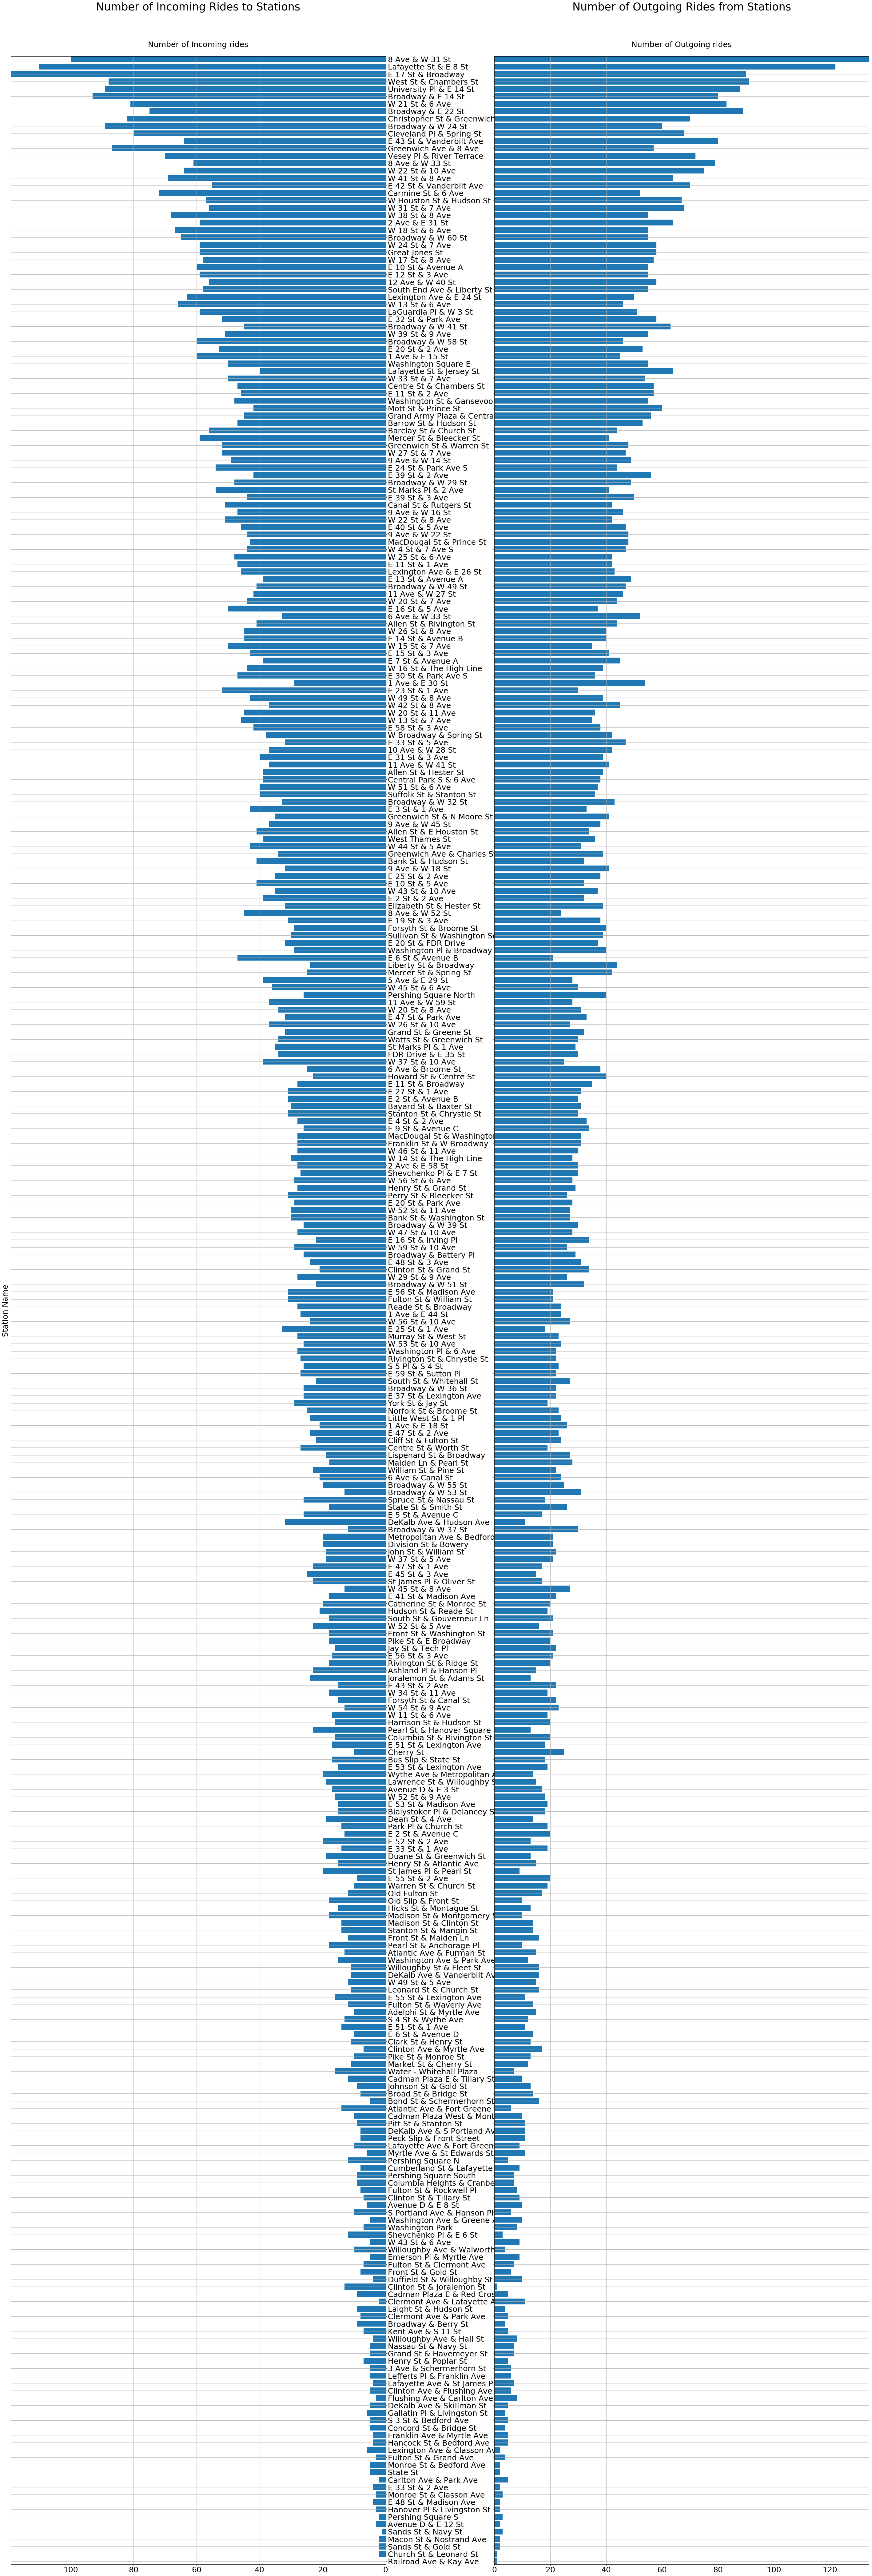

In [8]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=[50, 150])
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

y = np.arange(bikes_count_df['start station name'].shape[0])
axes[0].barh(y, bikes_count_df['end station bike count'])
axes[1].barh(y, bikes_count_df['start station bike count'])
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=bikes_count_df['start station name'])
axes[0].yaxis.tick_right()

for ax in axes:
    ax.tick_params(labelsize=25)
    
fig.subplots_adjust(wspace=0.29)

for ax in axes.flat:
    ax.margins(0)
    ax.grid(True)
title_size = 35
label_size = 25

axes[0].set_ylabel('Station Name',fontdict={'fontsize': label_size})
axes[0].set_title("Number of Incoming Rides to Stations", fontdict={'fontsize': title_size},pad=100);
axes[0].set_xlabel('Number of Incoming rides',fontdict={'fontsize': label_size}, labelpad=30);
axes[0].xaxis.set_label_position('top') 
axes[1].set_xlabel('Number of Outgoing rides',fontdict={'fontsize': label_size}, labelpad=30);
axes[1].set_title("Number of Outgoing Rides from Stations", fontdict={'fontsize': title_size},pad=100);
axes[1].xaxis.set_label_position('top') 

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

## Top 10 Least Traffic Stations

> 1. Railroad Ave & Kay Ave
> 2. Church St & Leonard St
> 3. Sands St & Gold St
> 4. Sands St & Navy St
> 5. Macon St & Nostrand Ave
> 6. Pershing Square S
> 7. Avenue D & E 12 St
> 8. Hanover Pl & Livingston St
> 9. E 33 St & 2 Ave
> 10. Monroe St & Classon Ave

## Effect of usertype on number of rides with hour, day and month 

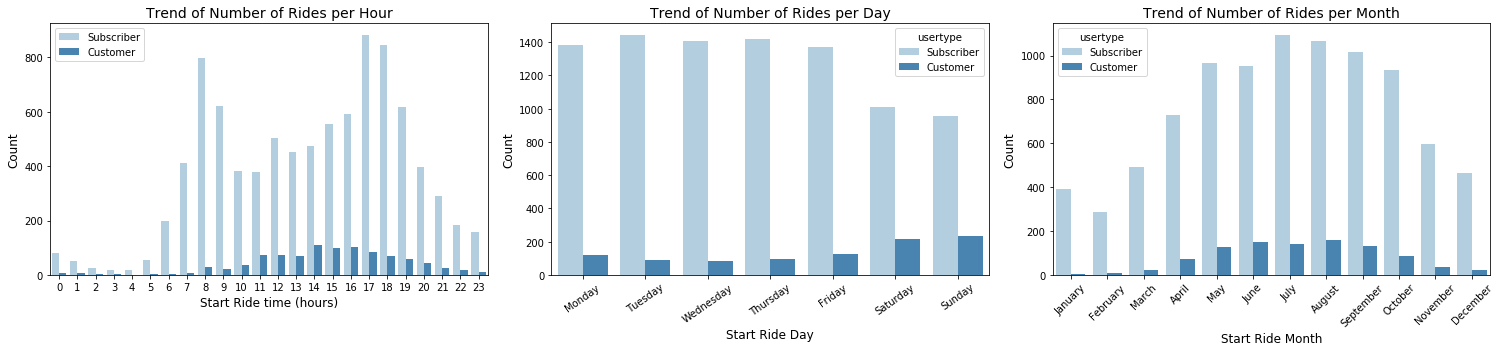

In [9]:

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.figure(figsize = [21,5])

plt.subplot(1, 3, 1)
sb.countplot(data = trip, x = 'starttime_hour', hue = 'usertype', palette = 'Blues')
plt.xlabel("Start Ride time (hours)")
plt.ylabel("Count")
plt.title("Trend of Number of Rides per Hour");
plt.legend(loc='upper left')

ax = plt.subplot(1, 3, 2)
sb.countplot(data = trip, x = 'starttime_day_name', hue = 'usertype', palette = 'Blues')
plt.xlabel("Start Ride Day")
plt.ylabel("Count")
plt.title("Trend of Number of Rides per Day");
plt.xticks(rotation=35)

ax = plt.subplot(1, 3, 3)
sb.countplot(data = trip, x = 'starttime_month_name', hue = 'usertype', palette = 'Blues')
plt.xlabel("Start Ride Month")
plt.ylabel("Count")
plt.title("Trend of Number of Rides per Month");

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Effect of User type on Tripduration

Subscribers have a wider range of trip duration but Customers generally have a higher trip duration. 

In [10]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

trip['log_tripduration_min'] = trip['tripduration_min'].apply(log_trans)

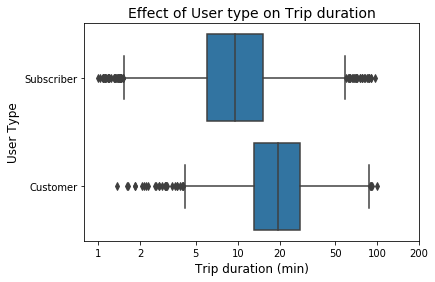

In [11]:
var = 'usertype'
sb.boxplot(data=trip, y=var, x='log_tripduration_min', color=base_color)
x_ticks = [1,2,5,10,20,50,100,200]
plt.xticks(log_trans(np.array(x_ticks)),x_ticks);
plt.xlabel('Trip duration (min)');
plt.ylabel('User Type');
plt.title('Effect of User type on Trip duration');

## Comparison of tripduration and count of rides for Subscriber and Customer over the year

> Tripduration and count of trips gives us an insight about some special days of the year when both the tripduration and count of trips were at higher end. Such days can be some holidays or some bike riding event.

In [12]:
def maxofdf(df1,df2):
    return max(df1.max().max(),df2.max().max())

def minofdf(df1,df2):
    return min(df1.min().min(),df2.min().min())

result1 = trip[trip["usertype"]=="Subscriber"].groupby(["starttime_month_name","starttime_day_name"]).agg({"bikeid":'count'}).reset_index().rename(columns={"starttime_month_name":"Ride Start Month", "starttime_day_name":"Ride Start Day", "bikeid":"Count"})
result1 = result1.pivot(index="Ride Start Month", columns="Ride Start Day", values="Count")
result2 = trip[trip["usertype"]=="Customer"].groupby(["starttime_month_name","starttime_day_name"]).agg({"bikeid":'count'}).reset_index().rename(columns={"starttime_month_name":"Ride Start Month", "starttime_day_name":"Ride Start Day", "bikeid":"Count"})
result2 = result2.pivot(index="Ride Start Month", columns="Ride Start Day", values="Count")

trip_dur_year_s = trip[trip["usertype"]=="Subscriber"].groupby(["starttime_month_name","starttime_day_name"]).agg({"tripduration_min":'sum'}).reset_index().rename(columns={"starttime_month_name":"Ride Start Month", "starttime_day_name":"Ride Start Day", "tripduration_min":"Ride Duration(min)"})
trip_dur_year_s = trip_dur_year_s.pivot(index="Ride Start Month", columns="Ride Start Day", values="Ride Duration(min)")

trip_dur_year_c = trip[trip["usertype"]=="Customer"].groupby(["starttime_month_name","starttime_day_name"]).agg({"tripduration_min":'sum'}).reset_index().rename(columns={"starttime_month_name":"Ride Start Month", "starttime_day_name":"Ride Start Day", "tripduration_min":"Ride Duration(min)"})
trip_dur_year_c = trip_dur_year_c.pivot(index="Ride Start Month", columns="Ride Start Day", values="Ride Duration(min)")


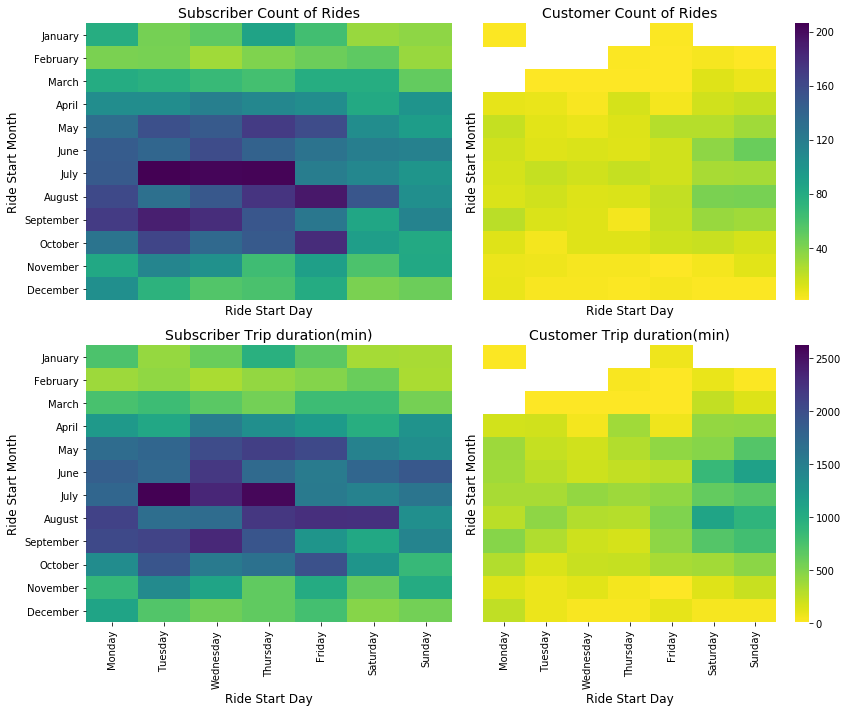

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sb.heatmap(result1, cmap="viridis_r", ax=ax[0,0], fmt="",vmin=minofdf(result1, result2),vmax=maxofdf(result1, result2), cbar=False,xticklabels=False)
ax[0,0].set_title("Subscriber Count of Rides")
sb.heatmap(result2, cmap="viridis_r", ax=ax[0,1], fmt="",vmin=minofdf(result1, result2),vmax=maxofdf(result1, result2), yticklabels=False,xticklabels=False)
ax[0,1].set_title("Customer Count of Rides")
sb.heatmap(trip_dur_year_s, cmap="viridis_r", ax=ax[1,0], fmt="",vmin=minofdf(trip_dur_year_s, trip_dur_year_c),vmax=maxofdf(trip_dur_year_s, trip_dur_year_c),cbar=False)
ax[1,0].set_title("Subscriber Trip duration(min)")
sb.heatmap(trip_dur_year_c, cmap="viridis_r", ax=ax[1,1], fmt="",vmin=minofdf(trip_dur_year_s, trip_dur_year_c),vmax=maxofdf(trip_dur_year_s, trip_dur_year_c),yticklabels=False)
ax[1,1].set_title("Customer Trip duration(min)")

plt.tight_layout()

## Overall trend

For Subscribers, Total Number of rides decrease in June, then increase again in July.For Customers, Total Number of rides decrease in July, then increase again in August.

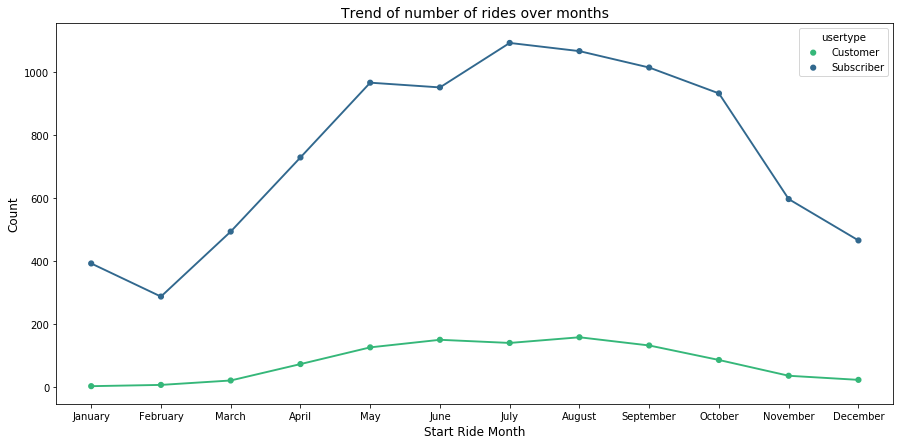

In [14]:
plt.figure(figsize=[15,7])
month_usertype_df= trip.groupby(['starttime_month_name','usertype']).agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid':'count'})

ax = sb.pointplot(x='starttime_month_name', y='count', hue='usertype', palette='viridis_r', scale=.7, data=month_usertype_df)

plt.xlabel("Start Ride Month")
plt.ylabel("Count")
plt.title("Trend of number of rides over months");

Thank You!